# Training Dataset 

The training dataset is in dataset_train.csv file. 

- [Preview](#preview)
    - [Reading data to pandas dataframe](#reading-data-to-pandas-dataframe)
    - [Describing dataset with statistics](#describing-dataset-with-statistics)
    - [Plots](#plots)
        - [Histogram](#histogram)
        - [Boxplot](#boxplot)
        - [Scatter plot](#scatter-plot)
        - [Pair Plot Matrix](#pair-plot-matrix)
        - [Boxplot Matrix](#boxplot-matrix)
        - [Conclusion : selecting features](#conclusion--selecting-features)
    - [Conclusion : selecting features](#conclusion--selecting-features)

- [Data preparation](#data-preparation)
    - [Selecting features](#selecting-features)
    - [Drop NaN containing rows](#drop-nan-containing-rows)
    - [Standardization : z-score method](Standardization)
    - [Data quality check](#data-quality)
        - [Boxplot matrix standardized](#boxplot-matrix-standardized)
        - [Heatmap](#heatmap-on-training-dataset)

- [Exploring other features](#exploring-other-features)
        - [Best Hand](#best-hand)


## Preview

Reading the csv file and looking at dataset.

### Reading data to pandas dataframe

In [24]:
# %pip install seaborn

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_train = f'../datasets/dataset_train.csv'
df = pd.read_csv(dataset_train)
df.head()

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

The `Hogwarts house` is the real outcome. We need to train our model with selected features and so that the predicted output `house` could later be compared to the real one. 
We need to inspect the features:
- non numeric or biographic features (first and last names, birthday dates and best hand) might be enriching our model accuracy but are harder to sort out. we will inspect them in a second round of training
- numeric values for columns Arithmancy to Flying, which represent 13 features is a good start

First, we will be focusing on `features` with `numeric values`.
Selecting numeric columns, where dtypes are np.number
There is total of `13 features` that has `numeric types`, index is not counted.
Standardization and handling missing data (NaN) will be required.

In [11]:
df.select_dtypes(include=np.number).head(10)

Index  Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0      0     58384.0 -487.886086   5.727180                       4.878861   
1      1     67239.0 -552.060507  -5.987446                       5.520605   
2      2     23702.0 -366.076117   7.725017                       3.660761   
3      3     32667.0  697.742809  -6.497214                      -6.977428   
4      4     60158.0  436.775204  -7.820623                            NaN   
5      5     21209.0 -613.687160  -4.289197                       6.136872   
6      6     49167.0  628.046051  -4.861976                      -6.280461   
7      7     33010.0  411.412727   5.931832                      -4.114127   
8      8     20278.0  496.394945  -5.215891                      -4.963949   
9      9     46316.0  527.193585   7.922205                      -5.271936   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   
5      -6.592     -440.997704     396.201804          5.380286   
6         NaN     -926.892512     583.742442         -7.322486   
7       2.769     -502.021336     439.351416               NaN   
8       5.855     -626.552041     567.842402         -6.198661   
9       3.356     -398.101991     341.475606          4.978614   

   Transfiguration    Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281   3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592   7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348   8.728531                  -0.515327 -227.34265   30.42  
3       920.391449   0.821911                  -0.014040 -256.84675  200.64  
4       937.434724   4.311066                  -0.264070 -256.38730  157.98  
5      1052.845164  11.751212                   1.049894 -247.94549  -34.69  
6       923.539573   1.646666                   0.153022 -257.83447  261.55  
7      1041.091935   6.581791                  -0.171704 -244.03492   72.25  
8       925.255500   1.086518                   1.147032 -252.27561  244.11  
9      1041.414665   2.068824                  -0.529579 -244.57527   -0.09

### Describing dataset with statistics

To describe statitics to dataset, we could have used pandas module describe() function
```python
df[df.columns[1:]].describe()
```
However, `pd.describe()` is a forbidden function and using it would be considered as cheating.

We will use our own `describe.py` Python program launched from `jupyter notebook`.
For that purpose, we can import the `os module`, to interact with the operating system
and execute it, of course in our `virtual environment`

In [12]:
import os

script_path = '../dslr/describe.py'
dataset_train = f'../datasets/dataset_train.csv'
os.system(f'../venv/bin/python {script_path} {dataset_train}')


             Index     Arithmancy  ...       Charms       Flying
count  1600.000000    1566.000000  ...  1600.000000  1600.000000
mean    799.500000   49634.570243  ...  -243.374409    21.958012
std     462.024530   16679.806036  ...     8.783640    97.631602
min       0.000000  -24370.000000  ...  -261.048920  -181.470000
25%     399.750000   38511.500000  ...  -250.652600   -41.870000
50%     799.500000   49013.500000  ...  -244.867765    -2.515000
75%    1199.250000   60811.250000  ...  -232.552305    50.560000
max    1599.000000  104956.000000  ...  -225.428140   279.070000

[8 rows x 14 columns]


0

Missing values for numeric columns features 

In [13]:
df[df.select_dtypes(include=np.number).columns[1:]].isna().sum()

Arithmancy                       34
Astronomy                        32
Herbology                        33
Defense Against the Dark Arts    31
Divination                       39
Muggle Studies                   35
Ancient Runes                    35
History of Magic                 43
Transfiguration                  34
Potions                          30
Care of Magical Creatures        40
Charms                            0
Flying                            0
dtype: int64

In [14]:
df[df.select_dtypes(include=np.number).columns[1:]].notna().sum()

Arithmancy                       1566
Astronomy                        1568
Herbology                        1567
Defense Against the Dark Arts    1569
Divination                       1561
Muggle Studies                   1565
Ancient Runes                    1565
History of Magic                 1557
Transfiguration                  1566
Potions                          1570
Care of Magical Creatures        1560
Charms                           1600
Flying                           1600
dtype: int64

### Plots

Exploring these 13 features.

    Only the meaningful variables should be included.
    The independent variables should be independent of each other. 
    That is, the model should have little or no multicollinearity.

In [15]:
df[df.select_dtypes(include=np.number).columns[1:]].columns.to_list()

['Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

Plots can be of 3 kinds :
- `distibution`, such as histograms
- `categorical`, such as boxplots
- `relational` such as scatter plot

Using inline matplotlib module. (Affichage avec la bibliothèque graphique intégrée à Notebook)



#### Histogram
Distribution of a given features among Hogwarts houses.
It looks like 2 houses (Griffindor and Slytherin) are not good at `Herbology`.
`Herbology` features might be a good feature for our model beacuse it might allow a better classification.

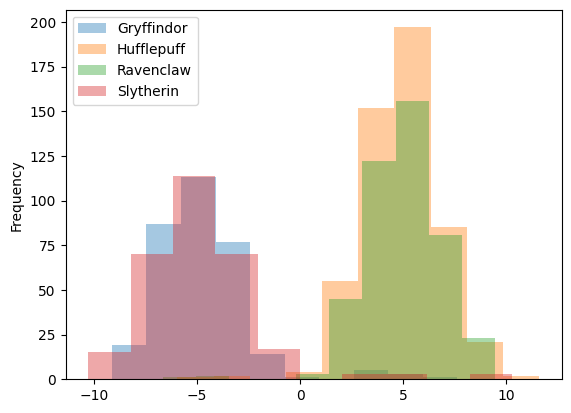

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

df_herb = df.groupby('Hogwarts House')['Herbology']
df_herb.plot(kind='hist', alpha=0.4, legend=True)
plt.show()

#### Boxplot

A `boxplot` is a graphical and standardised way to display the distribution of data based on five key numbers:

- “minimum”
- 1st Quartile (25th percentile)
- median (2nd Quartile/ 50th Percentile)
- 3rd Quartile (75th percentile)
- “maximum”

<Axes: xlabel='Hogwarts House', ylabel='Astronomy'>

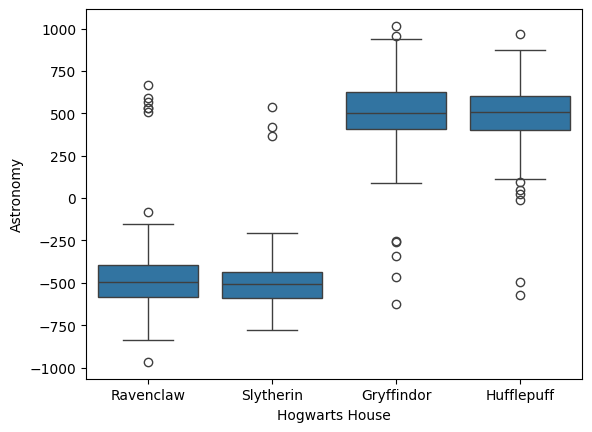

In [17]:
import seaborn as sns

sns.boxplot(x='Hogwarts House', y='Astronomy', data=df)

#### Scatter plot

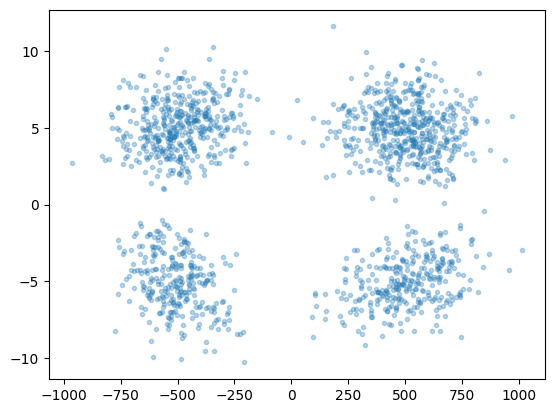

In [18]:
plt.scatter('Astronomy', 'Herbology', marker='.', alpha=0.3, data=df)
plt.show()

<Axes: xlabel='Astronomy', ylabel='Herbology'>

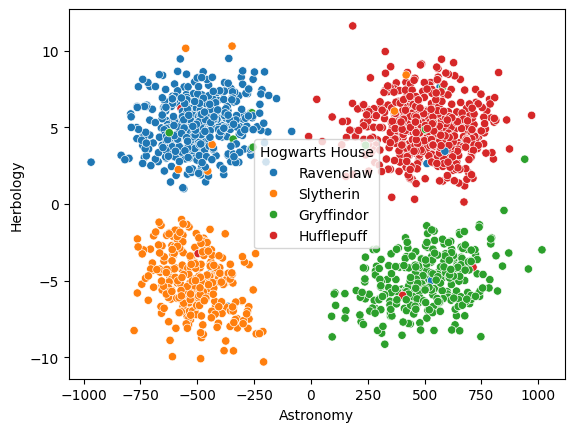

In [19]:
sns.scatterplot(
 data=df, 
 x="Astronomy",
 y="Herbology",
 hue="Hogwarts House",
)

<Axes: xlabel='Astronomy', ylabel='Defense Against the Dark Arts'>

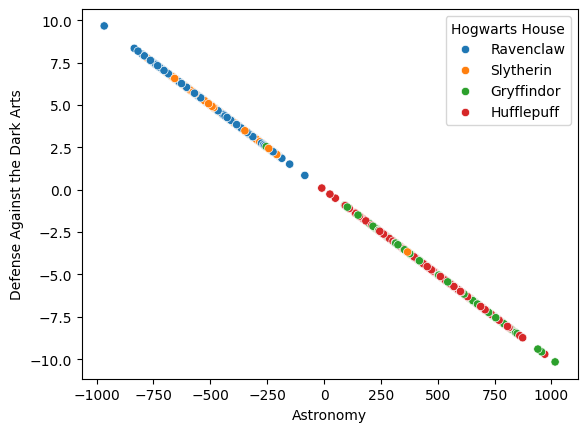

In [20]:
sns.scatterplot(
 data=df, 
 x="Astronomy",
 y="Defense Against the Dark Arts",
 hue="Hogwarts House",
 legend='auto'
)

#### Pair Plot Matrix

Lower triangle matrix with `Pair plots`.

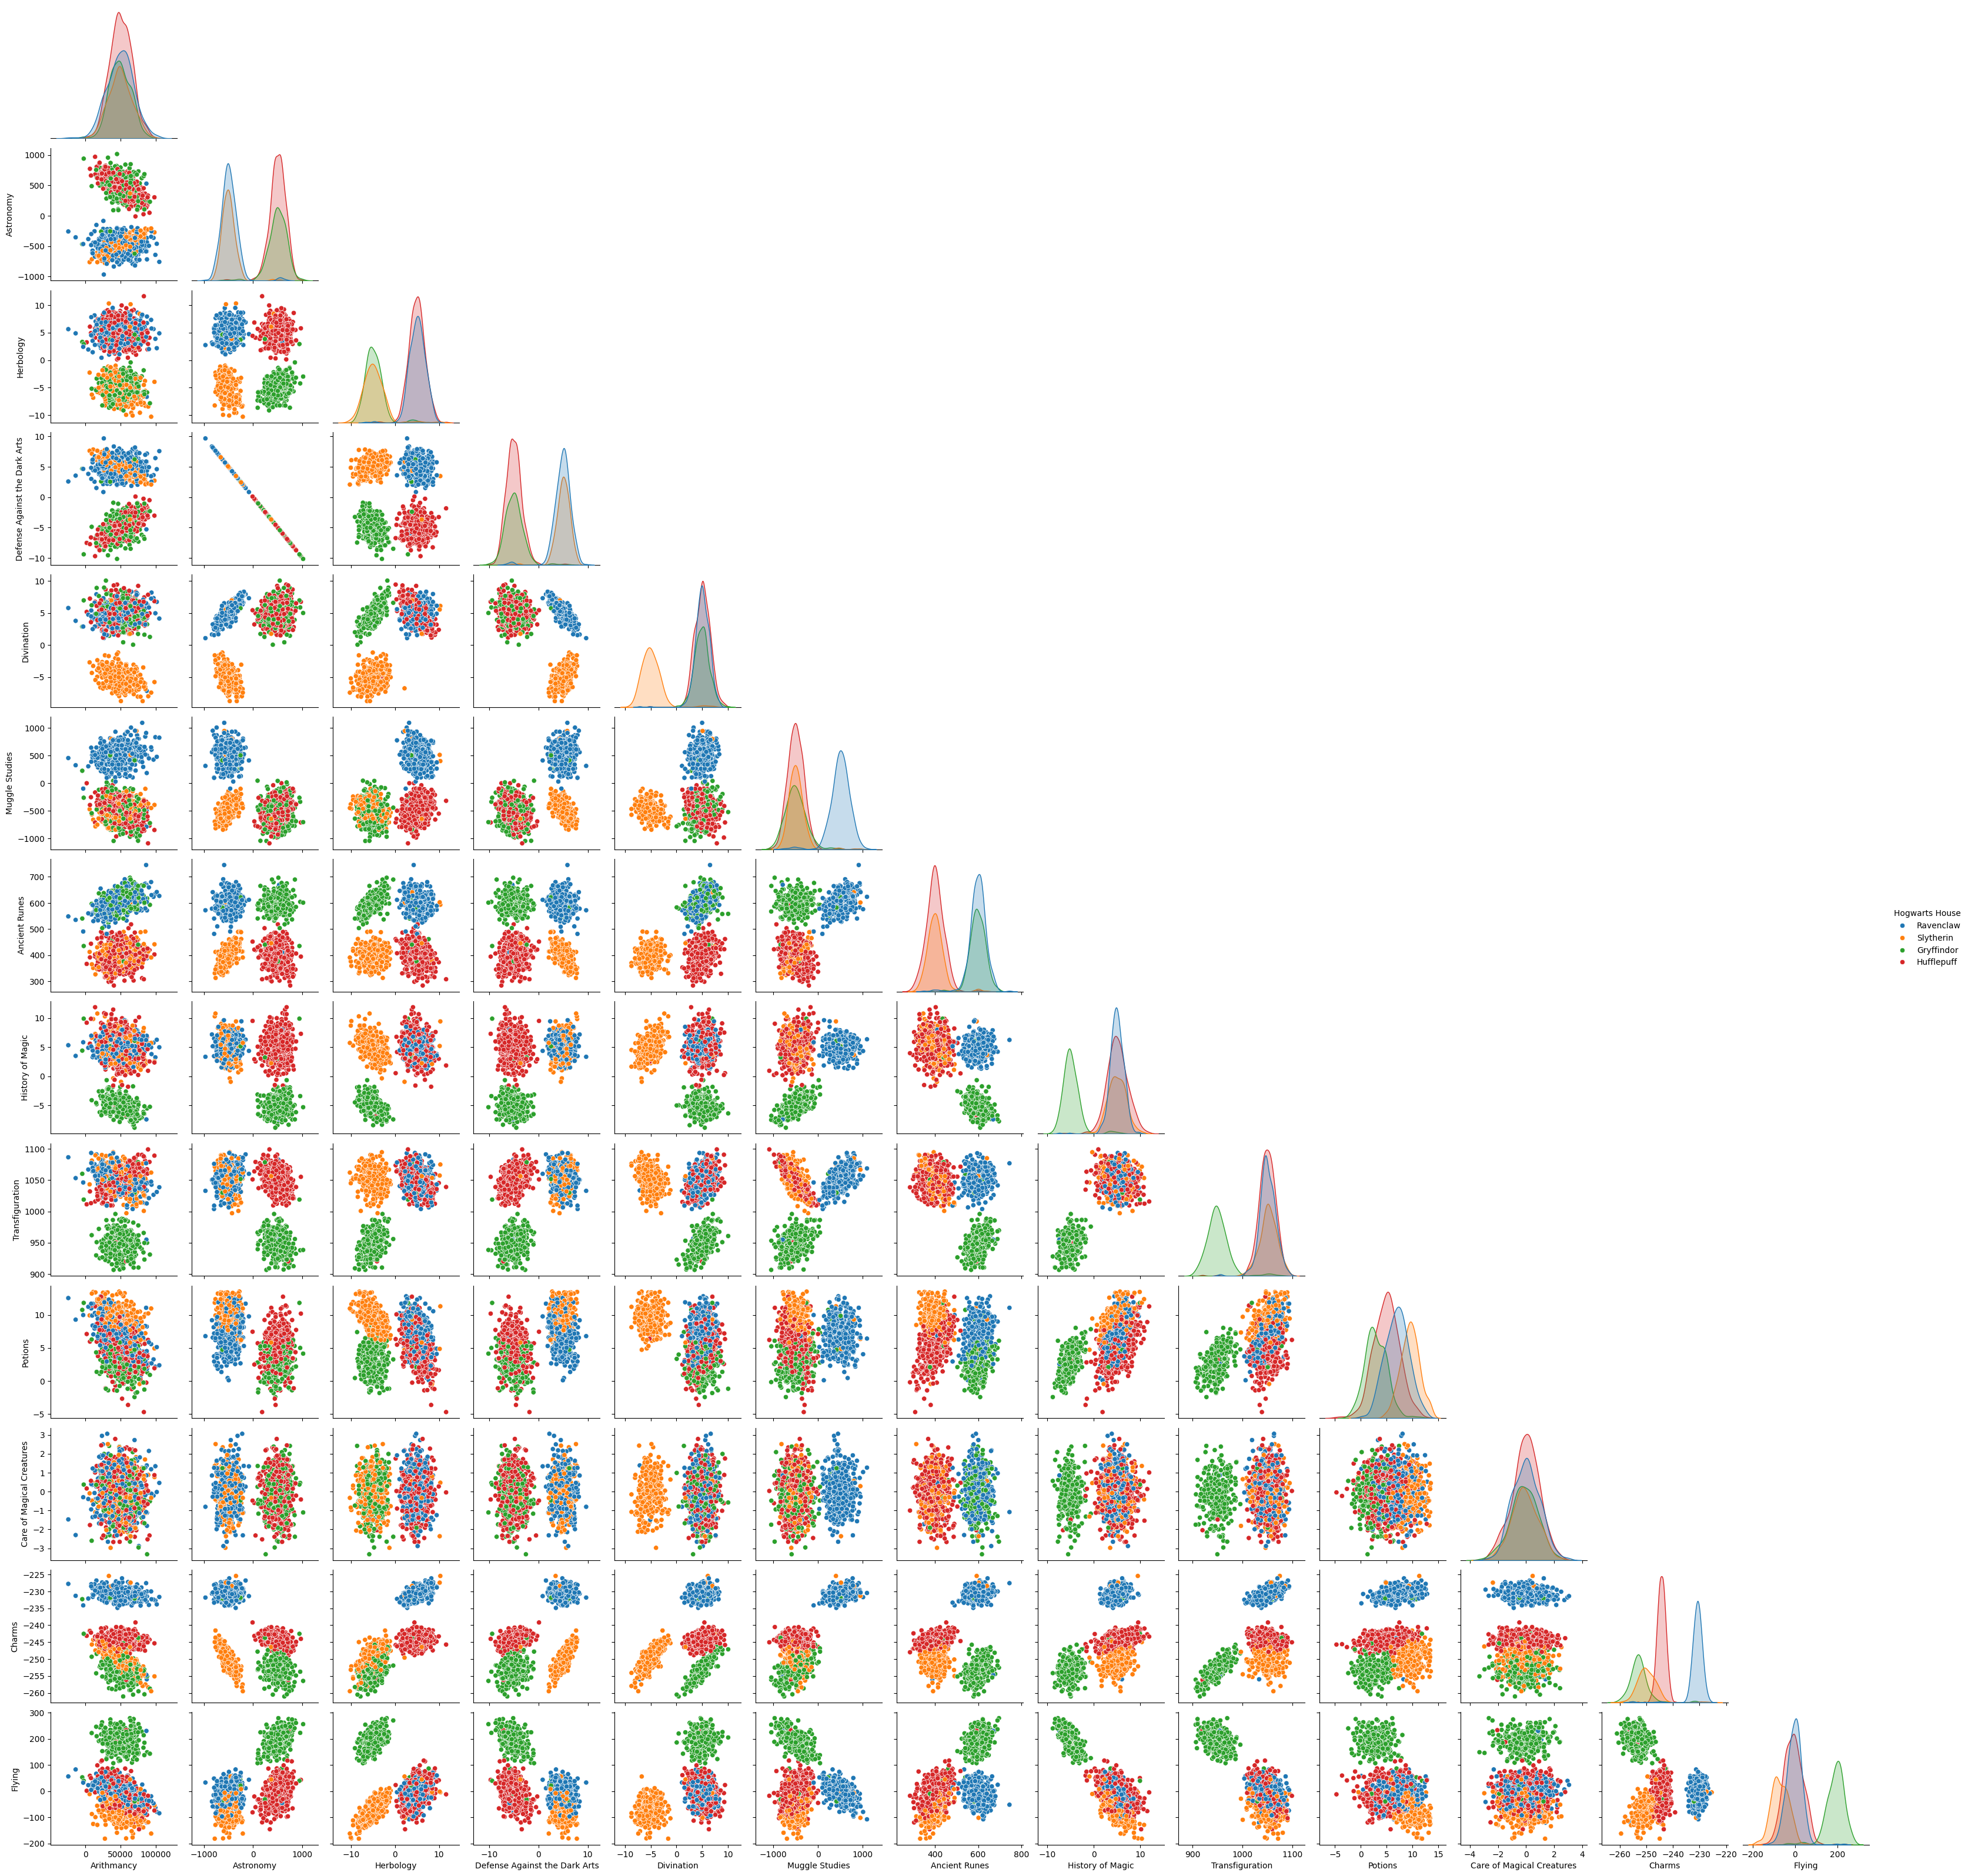

In [21]:
target="Hogwarts House"
remove_list = ['Index', 'First Name', 'Last Name', 'Birthday', 'Best Hand']

df_num = df.drop(remove_list, axis=1)
features = df_num.keys()[1:].to_list()
sns.pairplot(df_num,
                x_vars=features,
                y_vars=features,
                hue=target,
                corner=True
            )

#### Boxplot Matrix

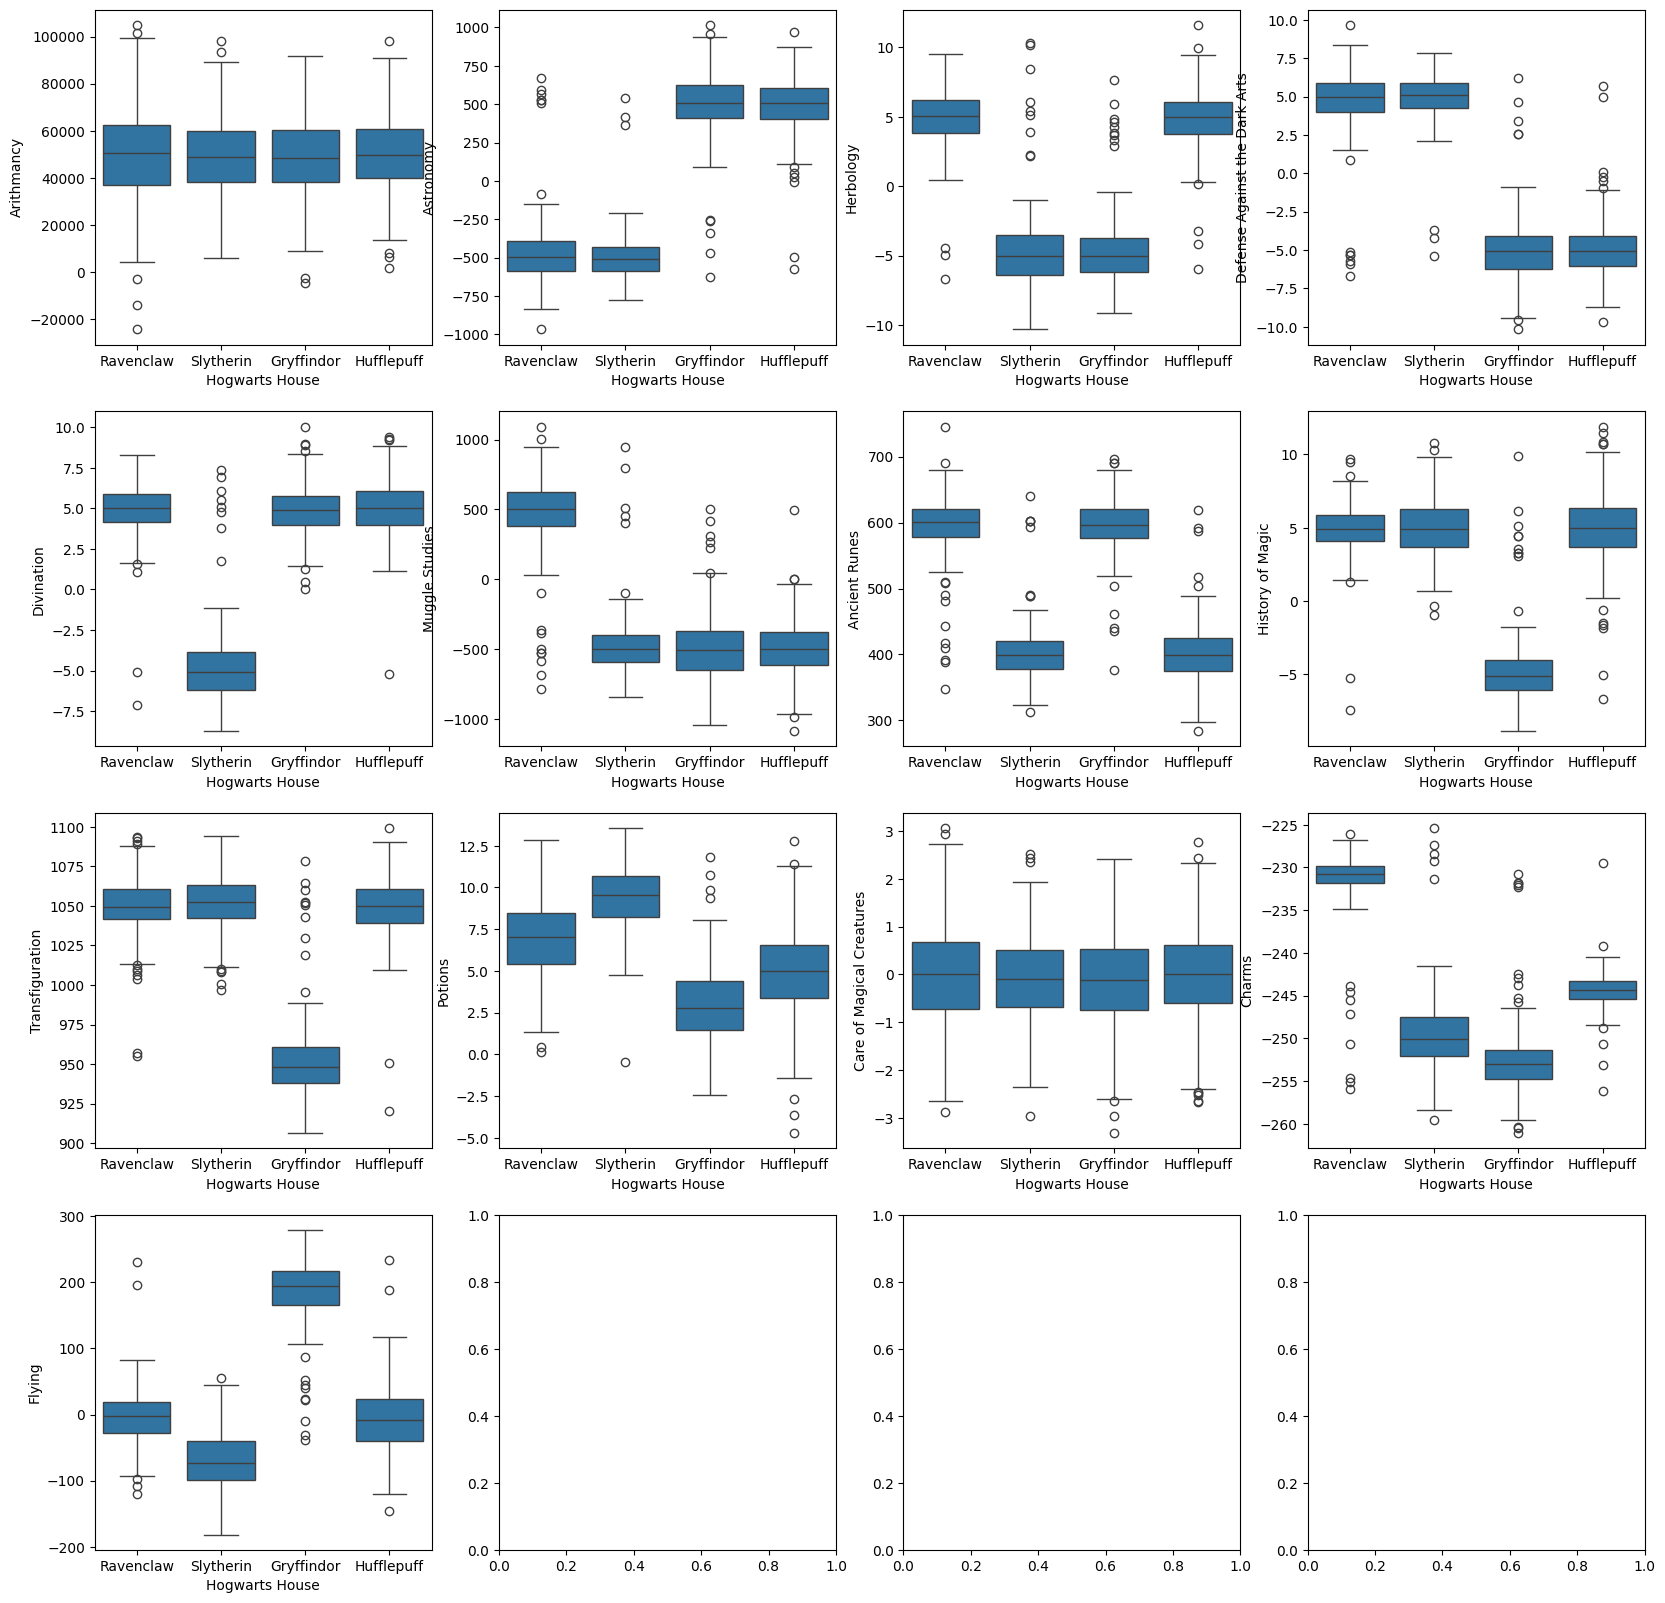

In [22]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
features = df[df.select_dtypes(include=np.number).columns[1:]].columns.to_list()
for idx in range(13):
    i = idx // 4
    j = idx % 4
    sns.boxplot(data=df, x="Hogwarts House", ax=axs[i, j], y=features[idx])
plt.show()

<Axes: xlabel='Hogwarts House', ylabel='Care of Magical Creatures'>

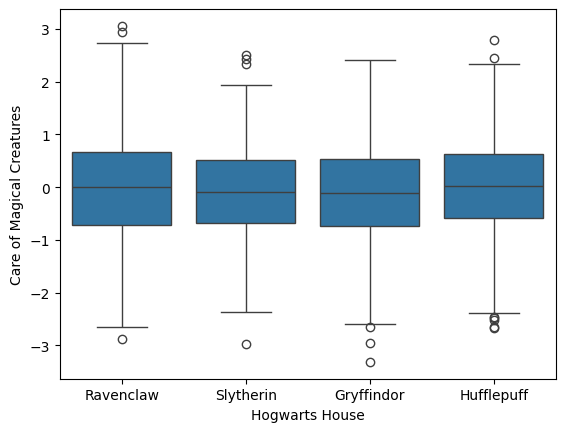

In [23]:
sns.boxplot(data=df, x="Hogwarts House", y="Care of Magical Creatures")

### Conclusion : selecting features

Two features['Arithmancy', 'Care of Magical Creatures'] cannot classify well, and "Defense Against the Dark Arts" is anti-correlated with  "Astronomy".

These features will be dropped before model training.

## Data preparation

Before training, we need to
- Keep only `meaningful features`
- Remove rows containg `NaN`
- `Standardize` input data

### Selecting features

Selecting `Meaningful` and `independent` features.

- pd.drop() : down to to 10 meaningful features, independent from each other

Thus, we can start training our model with `10 numeric features`

- [ ] 'Arithmancy',
- [X] 'Astronomy',
- [X] 'Herbology',
- [ ] 'Defense Against the Dark Arts',
- [X] 'Divination',
- [X] 'Muggle Studies',
- [X] 'Ancient Runes',
- [X] 'History of Magic',
- [X] 'Transfiguration',
- [X] 'Potions',
- [ ] 'Care of Magical Creatures',
- [X] 'Charms',
- [X] 'Flying'

### Drop NaN containing rows

- pd.dropna() : Dropping rows that contain NaN => down to 1333 rows

In [139]:
df_train= df.drop(df.columns[2:6], axis = 1)
excluded_features = ["Index", "Arithmancy", "Defense Against the Dark Arts", "Care of Magical Creatures"]
df_train.drop(excluded_features, inplace=True, axis=1)
df_train.dropna(inplace=True)
df_train.head()

Hogwarts House   Astronomy  Herbology  Divination  Muggle Studies  \
0      Ravenclaw -487.886086   5.727180       4.722      272.035831   
1      Slytherin -552.060507  -5.987446      -5.612     -487.340557   
2      Ravenclaw -366.076117   7.725017       6.140      664.893521   
3     Gryffindor  697.742809  -6.497214       4.026     -537.001128   
4     Gryffindor  436.775204  -7.820623       2.236     -444.262537   

   Ancient Runes  History of Magic  Transfiguration   Potions     Charms  \
0     532.484226          5.231058      1039.788281  3.790369 -232.79405   
1     367.760303          4.107170      1058.944592  7.248742 -252.18425   
2     602.585284          3.555579      1088.088348  8.728531 -227.34265   
3     523.982133         -4.809637       920.391449  0.821911 -256.84675   
4     599.324514         -3.444377       937.434724  4.311066 -256.38730   

   Flying  
0  -26.89  
1 -113.45  
2   30.42  
3  200.64  
4  157.98

### Standardization

Values are very different between features, they need to be scaled.

`Standardizing input values` for each `feature`, applied along axis=1, using the `z-score method`.

The `z-score` method (often called standardization) transforms the input into distribution with a `mean of 0`` and a `standard deviation of 1``.

Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation.

In [145]:
def standardize(arr: pd.Series):
    """z-score method, using pandas std"""
    mean = arr.mean()
    std = arr.std()
    return (arr - mean) / std

df_train.iloc[:,1:] = df_train.iloc[:,1:].agg(lambda feature: standardize(feature))
df_train.head()

Hogwarts House  Astronomy  Herbology  Divination  Muggle Studies  \
0      Ravenclaw  -1.019405   0.867510    0.366766        1.015010   
1      Slytherin  -1.142486  -1.376697   -2.140728       -0.547946   
2      Ravenclaw  -0.785784   1.250242    0.710837        1.823594   
3     Gryffindor   1.254526  -1.474355    0.197885       -0.650158   
4     Gryffindor   0.754013  -1.727884   -0.236450       -0.459282   

   Ancient Runes  History of Magic  Transfiguration   Potions    Charms  \
0       0.341729          0.504660         0.220663 -0.701620  1.193099   
1      -1.205529          0.251192         0.657019  0.412017 -1.012445   
2       1.000191          0.126793         1.320875  0.888527  1.813171   
3       0.261869         -1.759797        -2.499039 -1.657499 -1.542783   
4       0.969563         -1.451893        -2.110816 -0.533950 -1.490523   

     Flying  
0 -0.508231  
1 -1.395502  
2  0.079217  
3  1.824033  
4  1.386752

### Data quality 

#### Boxplot matrix standardized

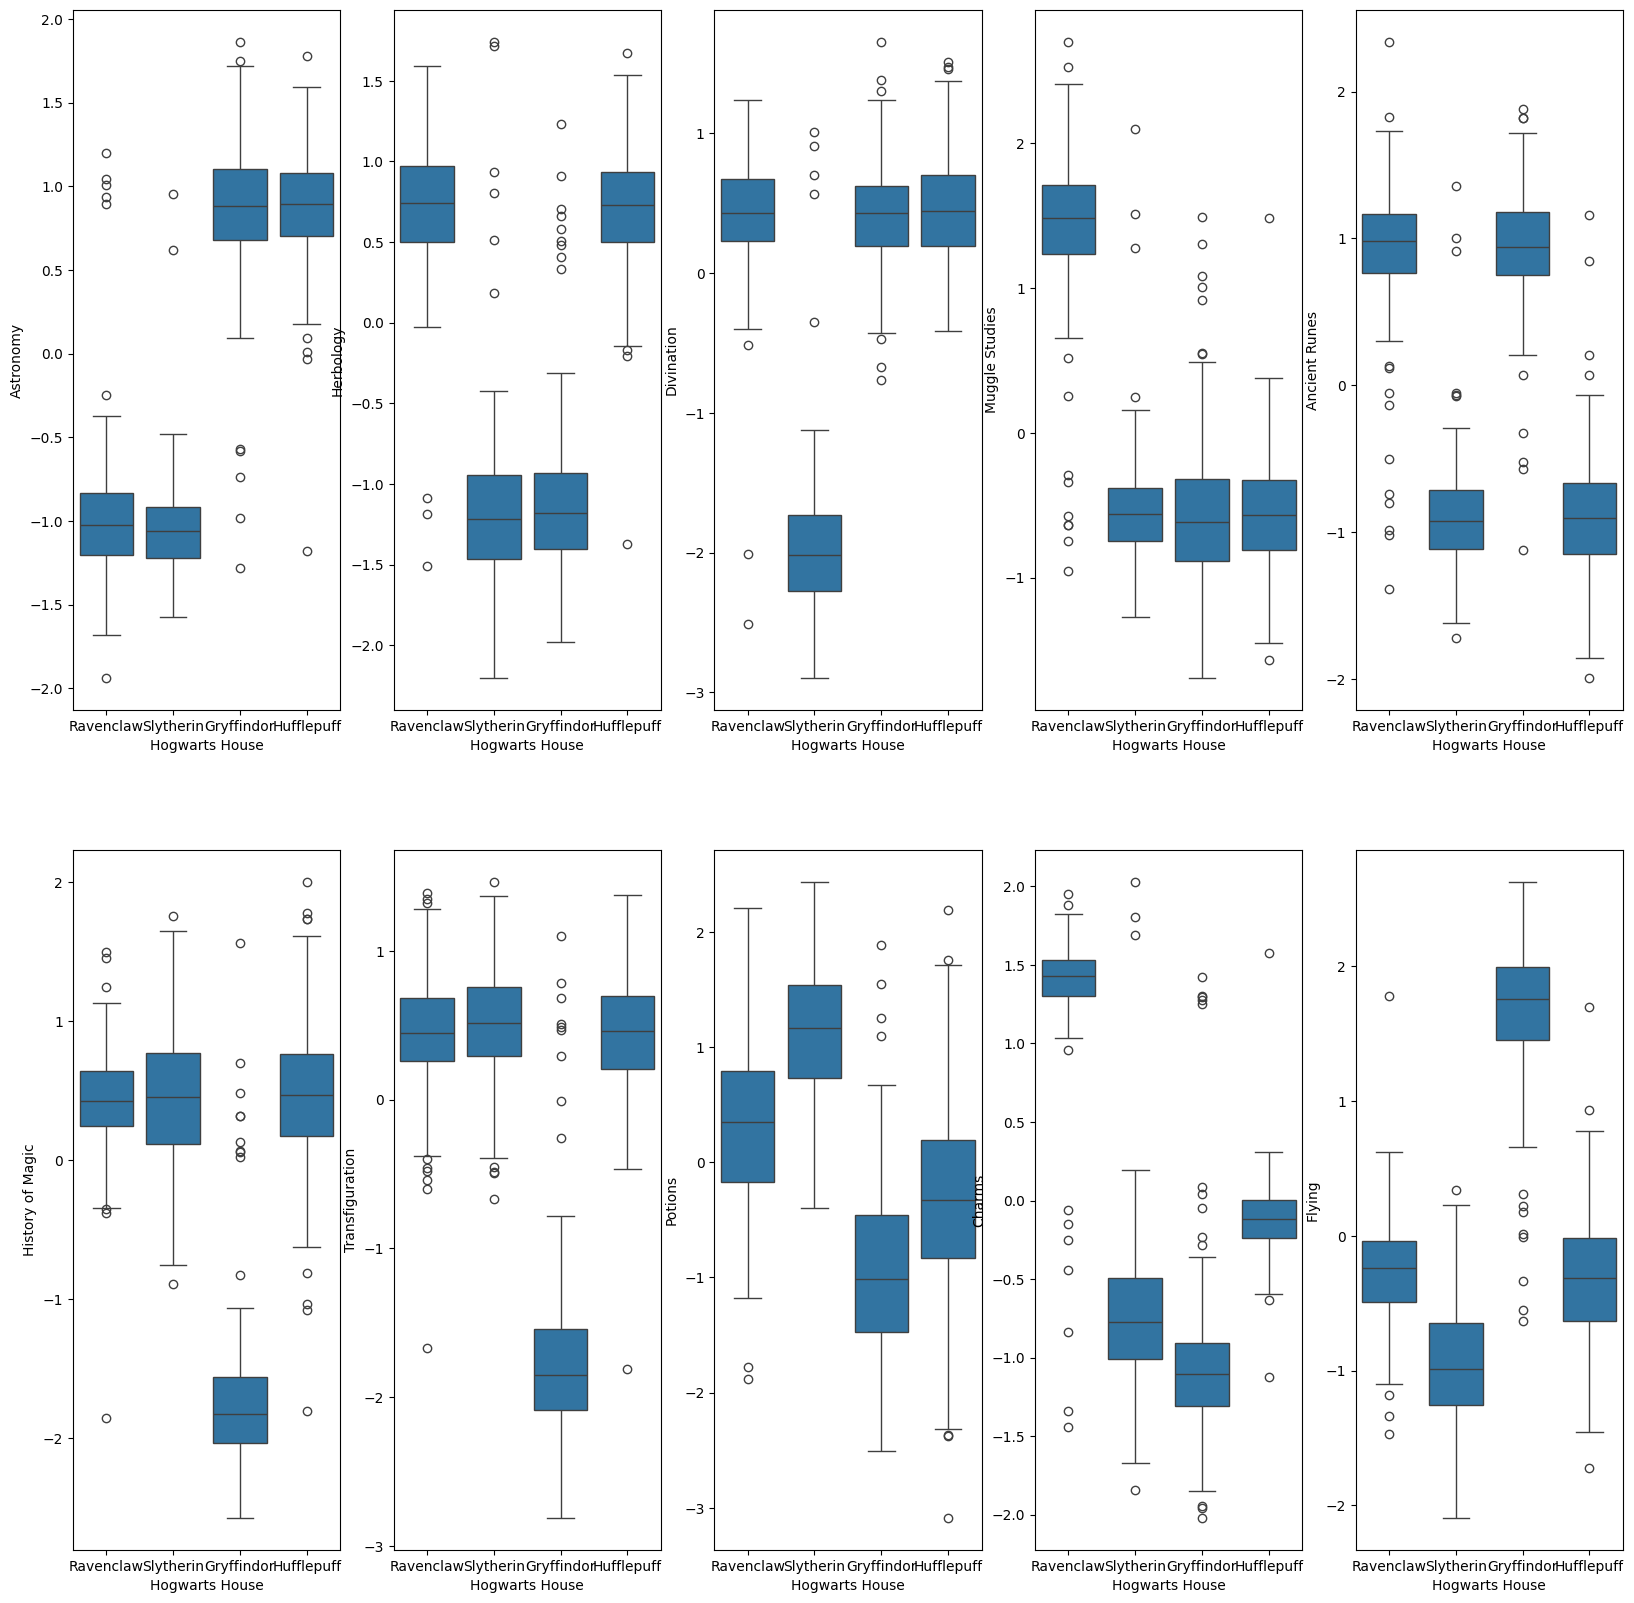

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 20))
features = df_train.columns[1:].to_list()
for idx in range(10):
    i = idx // 5
    j = idx % 5
    sns.boxplot(data=df_train, x='Hogwarts House', ax=axs[i, j], y=features[idx])
plt.show()

#### Heatmap on training dataset

<Axes: ylabel='Hogwarts House'>

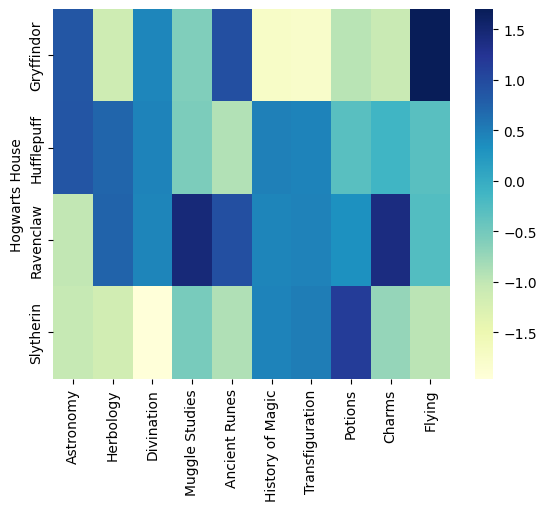

In [150]:
df_heat = df_train.groupby(["Hogwarts House"]).mean()
sns.heatmap(df_heat, cmap='YlGnBu')

### Exploring other features

#### Best Hand

`Best Hand` feature is binomial, either 'Left" or 'Right', there is no ambidextrious wizards.

In [151]:
df['Best Hand'].unique()

array(['Left', 'Right'], dtype=object)

Is `Best Hand` significative for house determination ?


In [152]:
def standardize(arr: pd.Series):
    """z-score method, using pandas std"""
    mean = arr.mean()
    std = arr.std()
    return (arr - mean) / std

df3 = df.drop(df.columns[2:5], axis = 1)
df3.iloc[:,3:] = df3.iloc[:,3:].agg(lambda feature: standardize(feature))
df3.head()

Index Hogwarts House Best Hand  Arithmancy  Astronomy  Herbology  \
0      0      Ravenclaw      Left    0.524552  -1.014194   0.878628   
1      1      Slytherin     Right    1.055434  -1.137535  -1.365690   
2      2      Ravenclaw      Left   -1.554729  -0.780078   1.261379   
3      3     Gryffindor      Left   -1.017252   1.264555  -1.463352   
4      4     Gryffindor      Left    0.630908   0.762982  -1.716894   

   Defense Against the Dark Arts  Divination  Muggle Studies  Ancient Runes  \
0                       1.010346    0.377371        1.021139       0.345639   
1                       1.133455   -2.109573       -0.540256      -1.204191   
2                       0.776671    0.718622        1.828915       1.005195   
3                      -1.264114    0.209874       -0.642366       0.265645   
4                            NaN   -0.220901       -0.451681       0.974516   

   History of Magic  Transfiguration   Potions  Care of Magical Creatures  \
0          0.512444         0.219633 -0.686183                   0.791972   
1          0.258503         0.653769  0.412462                   0.149365   
2          0.133871         1.314249  0.882556                  -0.475471   
3         -1.756242        -2.486237 -1.629193                   0.040544   
4         -1.447763        -2.099988 -0.520770                  -0.216832   

     Charms    Flying  
0  1.204553 -0.500330  
1 -1.002983 -1.386928  
2  1.825184  0.086673  
3 -1.533799  1.830165  
4 -1.481492  1.393217

In [155]:
df3 = df3.drop(df.columns[0], axis = 1).groupby(["Hogwarts House", "Best Hand"]).mean()
df3.head(8)

Arithmancy  Astronomy  Herbology  \
Hogwarts House Best Hand                                     
Gryffindor     Left        -0.086430   0.890434  -1.137209   
               Right        0.029339   0.851874  -1.132935   
Hufflepuff     Left        -0.000097   0.906598   0.734148   
               Right        0.073775   0.854096   0.713559   
Ravenclaw      Left        -0.008375  -0.965950   0.737446   
               Right       -0.014024  -1.029647   0.748996   
Slytherin      Left         0.011468  -1.009042  -1.110952   
               Right       -0.040671  -1.051245  -1.155053   

                          Defense Against the Dark Arts  Divination  \
Hogwarts House Best Hand                                              
Gryffindor     Left                           -0.901400    0.445977   
               Right                          -0.847352    0.393953   
Hufflepuff     Left                           -0.907779    0.471557   
               Right                          -0.855138    0.427417   
Ravenclaw      Left                            0.962793    0.437785   
               Right                           1.031275    0.444665   
Slytherin      Left                            1.003870   -1.844968   
               Right                           1.048143   -1.988843   

                          Muggle Studies  Ancient Runes  History of Magic  \
Hogwarts House Best Hand                                                    
Gryffindor     Left            -0.566500       0.953047         -1.783705   
               Right           -0.572261       0.950944         -1.729654   
Hufflepuff     Left            -0.564482      -0.921030          0.466757   
               Right           -0.561337      -0.878080          0.458386   
Ravenclaw      Left             1.451102       0.950488          0.445536   
               Right            1.482332       0.968262          0.437229   
Slytherin      Left            -0.486431      -0.837184          0.481403   
               Right           -0.557243      -0.927029          0.425044   

                          Transfiguration   Potions  \
Hogwarts House Best Hand                              
Gryffindor     Left             -1.808807 -0.970097   
               Right            -1.768964 -0.942811   
Hufflepuff     Left              0.437685 -0.337777   
               Right             0.444510 -0.291114   
Ravenclaw      Left              0.461725  0.346276   
               Right             0.455779  0.304603   
Slytherin      Left              0.452352  1.101770   
               Right             0.534975  1.134464   

                          Care of Magical Creatures    Charms    Flying  
Hogwarts House Best Hand                                                 
Gryffindor     Left                       -0.001216 -1.068523  1.741176  
               Right                      -0.182642 -1.061760  1.679513  
Hufflepuff     Left                        0.026303 -0.112368 -0.290714  
               Right                       0.025132 -0.109189 -0.304175  
Ravenclaw      Left                        0.134880  1.376719 -0.261915  
               Right                      -0.010452  1.420844 -0.269148  
Slytherin      Left                       -0.083156 -0.675348 -0.937466  
               Right                       0.009806 -0.738749 -0.952451

<Axes: ylabel='Hogwarts House-Best Hand'>

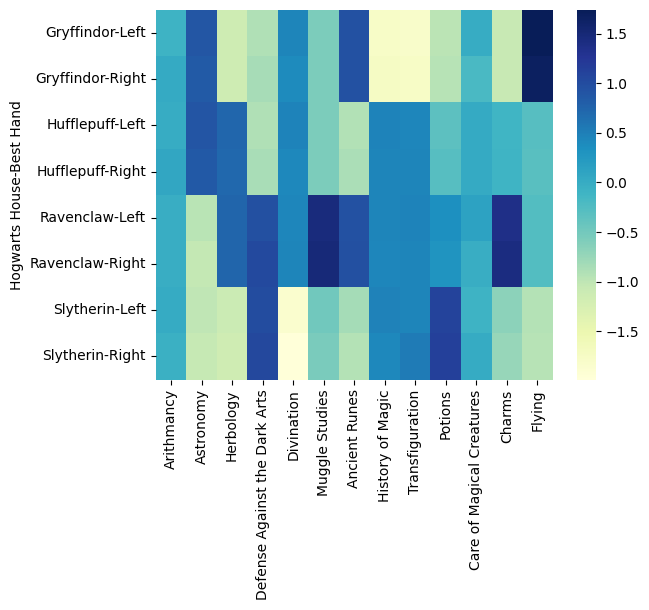

In [156]:
sns.heatmap(df3, cmap='YlGnBu')